2024-11-29 15:46:56,977 - mmseg - INFO - initialize SCTNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'pretrain/SCT-B_Pretrain.pth'}
2024-11-29 15:46:56,978 - mmcv - INFO - load model from: pretrain/SCT-B_Pretrain.pth
2024-11-29 15:46:56,978 - mmcv - INFO - load checkpoint from local path: pretrain/SCT-B_Pretrain.pth
2024-11-29 15:46:57,722 - mmseg - INFO - initialize VitGuidanceHead with init_cfg {'type': 'Pretrained', 'checkpoint': 'pretrain/Teacher_SegFormer_B3_ADE.pth'}
2024-11-29 15:46:57,723 - mmcv - INFO - load model from: pretrain/Teacher_SegFormer_B3_ADE.pth
2024-11-29 15:46:57,723 - mmcv - INFO - load checkpoint from local path: pretrain/Teacher_SegFormer_B3_ADE.pth
2024-11-29 15:46:58,242 - mmcv - WARNING - The model and loaded state dict do not match exactly

size mismatch for teacher_head.conv_seg.weight: copying a param with shape torch.Size([150, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([37, 256, 1, 1]).
size mismatch for teacher_head

load checkpoint from local path: work_dirs/sctnet-b_8x4_160k_pets/iter_108000.pth


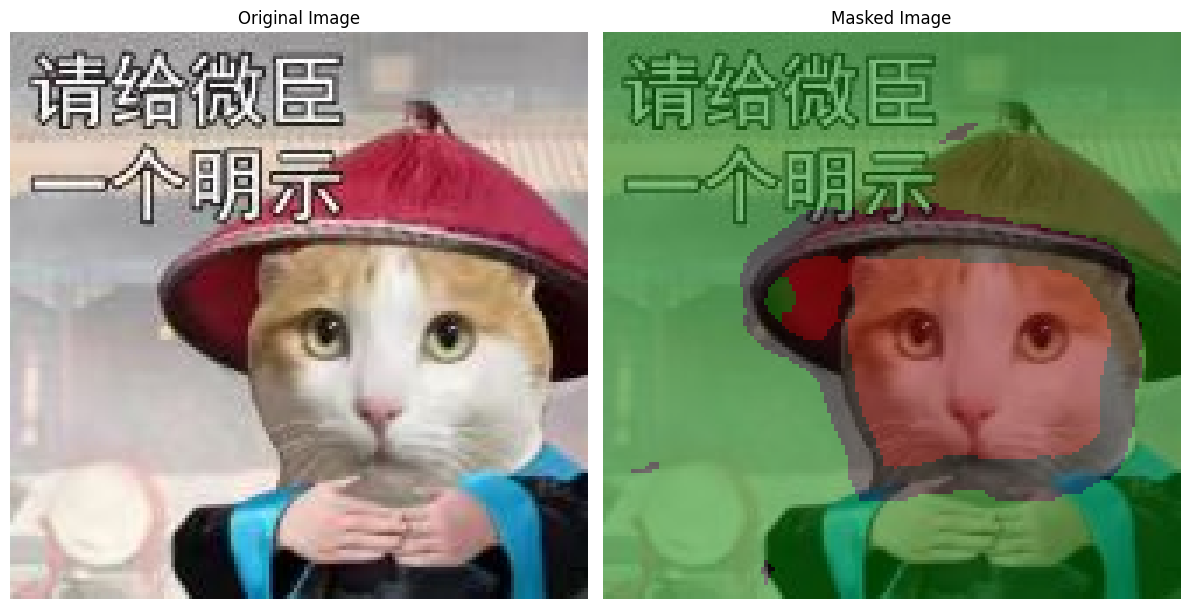

In [27]:
import mmcv
import torch
import numpy as np
import matplotlib.pyplot as plt

from mmseg.apis import init_segmentor, inference_segmentor

# config_path = r"configs/sctnet/ADE20K/sctnet-b_8x4_160k_ade.py"
# checkpoint = r"configs/sctnet/ADE20K/pretrain/SCTNet-B-ADE20K.pth"

# config_path = r"configs/sctnet/COCO-Stuff-10K/sctnet_b_4x4_160k.py"
# checkpoint = r"configs/sctnet/COCO-Stuff-10K/pretrain/SCTNet-B_COCO-Stuff-10K.pth"

config_file = r"configs/sctnet/pets/sctnet-b_8x4_160k_pets.py"
checkpoint_file = r"work_dirs/sctnet-b_8x4_160k_pets/latest.pth"

# 初始化模型
model = init_segmentor(config_file, checkpoint_file, device='cuda:0' if torch.cuda.is_available() else 'cpu')

# img = mmcv.imread('data/pets/test/img_dir/Abyssinian_111.jpg')
img = mmcv.imread('demo/cat1.jpg')

# 使用模型进行推理
with torch.no_grad():
    result = inference_segmentor(model, img)

# model.show_result(img, result, out_file='result.jpg') # 输出绘制后的图片

masked_img = model.show_result(img, result)

# 创建一个包含2个子图的图像布局，1行2列
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 在第一个子图中绘制原始图像img
axes[0].imshow(mmcv.bgr2rgb(img))  # 将BGR格式转换为RGB格式（matplotlib默认使用RGB格式显示图像）
axes[0].set_title('Original Image')
axes[0].axis('off')  # 关闭坐标轴显示，让图像展示更简洁

# 在第二个子图中绘制带有分割结果的图像masked_img
axes[1].imshow(mmcv.bgr2rgb(masked_img))
axes[1].set_title('Masked Image')
axes[1].axis('off')

# 调整子图之间的间距等布局细节，让图像展示更美观
plt.tight_layout()

# 显示绘制好的图像
plt.show()